In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from gpflow.likelihoods import Gaussian
from gpflow.kernels import RBF, White
from gpflow.models.gpr import GPR
from gpflow.training import AdamOptimizer, ScipyOptimizer

from doubly_stochastic_dgp.dgp import DGP

np.random.seed(0)

In [2]:
Ns = 200
Xs = np.linspace(-0.5, 1.5, Ns)[:, None]

N, M = 500, 25
X = np.random.uniform(0, 1, N)[:, None]
Z = np.random.uniform(0, 1, M)[:, None]
f_step = lambda x: 0. if x<0.5 else 1.
Y = np.reshape([f_step(x) for x in X], X.shape) + np.random.randn(*X.shape)*1e-2

# 3 layers

## 3 layers, 1 Node

(16000, 1)
(16000, 1)


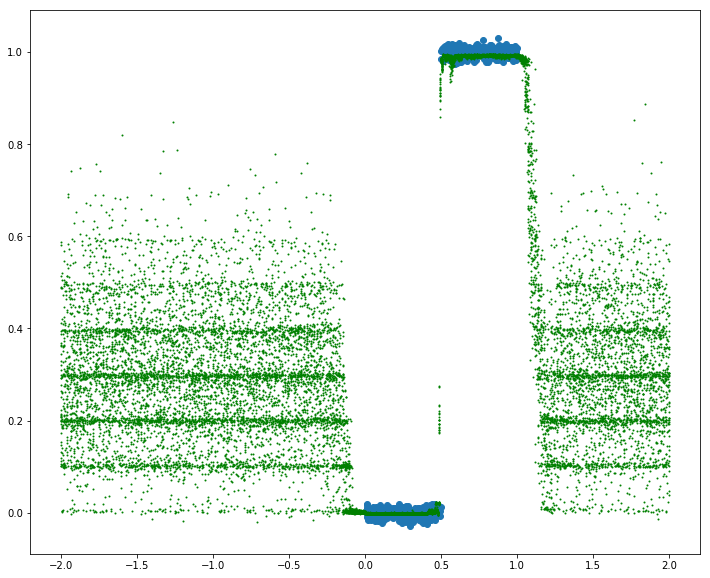

In [3]:
kernels = []
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))
m_dgp_3_1 = DGP(X, Y, Z, kernels, Gaussian(), num_samples=10)
# init the layers to near determinisic 
for layer in m_dgp_3_1.layers[:-1]:
    layer.q_sqrt = layer.q_sqrt.value * 1e-5

AdamOptimizer(0.01).minimize(m_dgp_3_1, maxiter=1000)

n_samples_each_point = 20
points_x = np.tile(np.linspace(-2.0, 2.0, 800),[n_samples_each_point])[:,None]
points_y, _ = m_dgp_3_1.predict_y(points_x, 10) # Devuelve mean and var
points_y = np.mean(points_y, 0)
plt.figure(figsize=(12,10))
print(points_x.shape)
print(points_y.shape)
# (16000, 1) and (2, 20, 16000, 1)
plt.plot(points_x, points_y, 'g.', markersize=2)
plt.scatter(X, Y)

## 3 layers, 2 Nodes

(16000, 1)
(16000, 1)


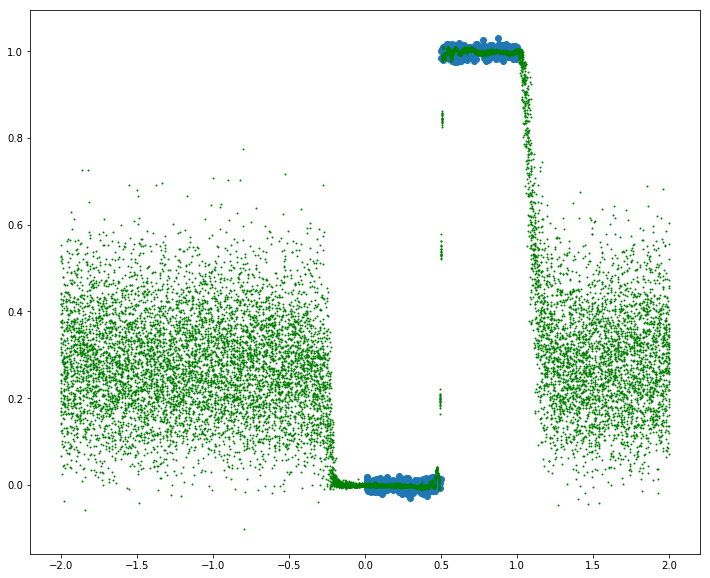

In [4]:
kernels = []
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))
kernels.append(RBF(2, lengthscales=0.2, variance=1.) + White(2, variance=1e-5))
kernels.append(RBF(2, lengthscales=0.2, variance=1.) + White(2, variance=1e-5))


m_dgp_3_2 = DGP(X, Y, Z, kernels, Gaussian(), num_samples=10)

for layer in m_dgp_3_2.layers[:-1]:
    layer.q_sqrt = layer.q_sqrt.value * 1e-5

AdamOptimizer(0.01).minimize(m_dgp_3_2, maxiter=1000)

n_samples_each_point = 20
points_x = np.tile(np.linspace(-2.0, 2.0, 800),[n_samples_each_point])[:,None]
points_y, _ = m_dgp_3_2.predict_y(points_x, 10) # Devuelve mean and var
points_y = np.mean(points_y, 0)
plt.figure(figsize=(12,10))
print(points_x.shape)
print(points_y.shape)
# (16000, 1) and (2, 20, 16000, 1)
plt.plot(points_x, points_y, 'g.', markersize=2)
plt.scatter(X, Y)

# 4 layer

## 4 layer, 1 node

(16000, 1)
(16000, 1)


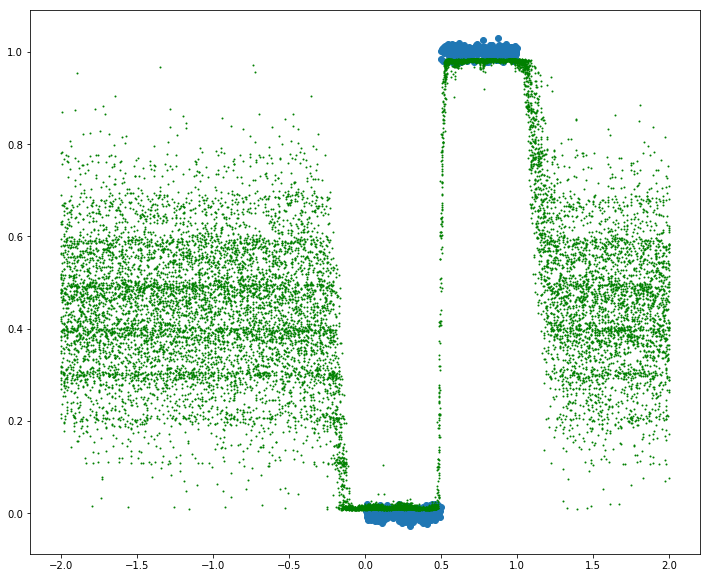

In [5]:
kernels = []
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))

m_dgp_4_1 = DGP(X, Y, Z, kernels, Gaussian(), num_samples=10)

for layer in m_dgp_4_1.layers[:-1]:
    layer.q_sqrt = layer.q_sqrt.value * 1e-5

AdamOptimizer(0.01).minimize(m_dgp_4_1, maxiter=1000)

n_samples_each_point = 20
points_x = np.tile(np.linspace(-2.0, 2.0, 800),[n_samples_each_point])[:,None]
points_y, _ = m_dgp_4_1.predict_y(points_x, 10) # Devuelve mean and var
points_y = np.mean(points_y, 0)
plt.figure(figsize=(12,10))
print(points_x.shape)
print(points_y.shape)
# (16000, 1) and (2, 20, 16000, 1)
plt.plot(points_x, points_y, 'g.', markersize=2)
plt.scatter(X, Y)

## 4 layer, 2 nodes

(16000, 1)
(16000, 1)


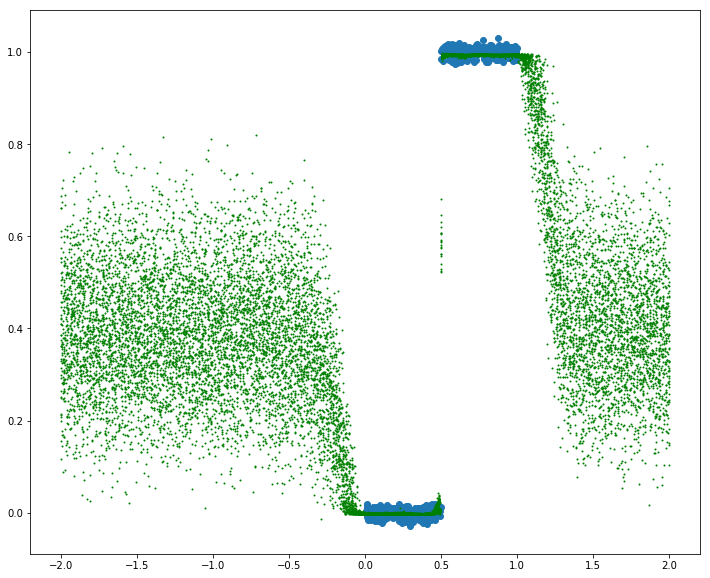

In [6]:
kernels = []
kernels.append(RBF(1, lengthscales=0.2, variance=1.) + White(1, variance=1e-5))
kernels.append(RBF(2, lengthscales=0.2, variance=1.) + White(2, variance=1e-5))
kernels.append(RBF(2, lengthscales=0.2, variance=1.) + White(2, variance=1e-5))
kernels.append(RBF(2, lengthscales=0.2, variance=1.) + White(2, variance=1e-5))

m_dgp_4_2 = DGP(X, Y, Z, kernels, Gaussian(), num_samples=10)

for layer in m_dgp_4_2.layers[:-1]:
    layer.q_sqrt = layer.q_sqrt.value * 1e-5

AdamOptimizer(0.01).minimize(m_dgp_4_2, maxiter=1000)

n_samples_each_point = 20
points_x = np.tile(np.linspace(-2.0, 2.0, 800),[n_samples_each_point])[:,None]
points_y, _ = m_dgp_4_2.predict_y(points_x, 10) # Devuelve mean and var
points_y = np.mean(points_y, 0)
plt.figure(figsize=(12,10))
print(points_x.shape)
print(points_y.shape)
# (16000, 1) and (2, 20, 16000, 1)
plt.plot(points_x, points_y, 'g.', markersize=2)
plt.scatter(X, Y)